In [2]:
import numpy as np 
import pandas as pd 

In [3]:
# Reading the CSV Files
apple = pd.read_csv('apple_stock_price_data.csv')
reliance = pd.read_csv('Reliance_stock_price_data.csv')

In [4]:
print(apple.head())

         Date    Close    Volume     Open       High        Low
0  08/21/2024  $226.40  34765480  $226.52    $227.98    $225.05
1  08/20/2024  $226.51  30299030  $225.77    $227.17    $225.45
2  08/19/2024  $225.89  40687810  $225.72    $225.99    $223.04
3  08/16/2024  $226.05  44340240  $223.92  $226.8271  $223.6501
4  08/15/2024  $224.72  46414010  $224.60    $225.35    $222.76


In [5]:
print(reliance.head())

         Date         Open         High          Low        Close  \
0  2019-08-22  1162.071167  1162.116821  1132.766846  1139.944336   
1  2019-08-23  1132.858276  1174.003174  1121.429077  1166.551392   
2  2019-08-26  1183.146484  1183.146484  1151.144897  1158.276733   
3  2019-08-27  1174.917480  1174.917480  1153.156372  1165.637085   
4  2019-08-28  1164.631348  1171.260254  1148.447632  1155.076538   

     Adj Close    Volume  
0  1119.930054   7015976  
1  1146.069946  10653957  
2  1137.940674   9601252  
3  1145.171753  14200953  
4  1134.796631   5802744  


In [6]:
print(apple.info())
print(apple.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1258 non-null   object
 1   Close   1258 non-null   object
 2   Volume  1258 non-null   int64 
 3   Open    1258 non-null   object
 4   High    1258 non-null   object
 5   Low     1258 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB
None
             Volume
count  1.258000e+03
mean   9.478002e+07
std    5.213294e+07
min    2.404834e+07
25%    6.036638e+07
50%    8.098160e+07
75%    1.119406e+08
max    4.268848e+08


In [7]:
print(reliance.info())
print(reliance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB
None
              Open         High          Low        Close    Adj Close  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean   2126.561273  2148.433910  2103.493117  2125.248374  2106.067440   
std     493.628447   495.352084   492.189195   494.078981   497.722041   
min     837.711609   868.616089   800.635437   808.315857   794.124023   
25%    1844.049499  1860.917358  1827.216278  1840.842103  1815.881623   
50%    2215.199219  22

In [8]:
print(apple.isnull().sum())

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [9]:
print(reliance.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Renamed the column 'Close/Last' to 'Close'
apple.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [13]:
# Removed the 'Adj Close' column from Reliance csv 
reliance.drop(columns=['Adj Close'], inplace=True)

In [14]:
# Removed the $ symbol from all the columns
apple = apple.replace({'\$': ''}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vj/bzq0bvbn591gs49t9sxbbd740000gn/T/ipykernel_16108/2375142656.py:1: SyntaxWarning: invalid escape sequence '\$'
  apple = apple.replace({'\$': ''}, regex=True)


In [15]:
apple.head()

,Date,Close,Volume,Open,High,Low
0,08/21/2024,226.40,34765480,226.52,227.98,225.05
1,08/20/2024,226.51,30299030,225.77,227.17,225.45
2,08/19/2024,225.89,40687810,225.72,225.99,223.04
3,08/16/2024,226.05,44340240,223.92,226.8271,223.6501
4,08/15/2024,224.72,46414010,224.60,225.35,222.76


In [16]:
reliance.head()

,Date,Open,High,Low,Close,Volume
0,2019-08-22,1162.071167,1162.116821,1132.766846,1139.944336,7015976
1,2019-08-23,1132.858276,1174.003174,1121.429077,1166.551392,10653957
2,2019-08-26,1183.146484,1183.146484,1151.144897,1158.276733,9601252
3,2019-08-27,1174.917480,1174.917480,1153.156372,1165.637085,14200953
4,2019-08-28,1164.631348,1171.260254,1148.447632,1155.076538,5802744


In [17]:
# Making a copy of the dataframes
apple_df = apple.copy()
reliance_df = reliance.copy()

In [18]:
# Keeping only the 'Close' price
apple_df= apple[['Date', 'Close']]
reliance_df = reliance[['Date', 'Close']]

In [37]:
# applying MinMaxScaler to the dataframe
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling for Apple
apple_scaled = scaler.fit_transform(apple_df['Close'].values.reshape(-1, 1))

# Scaling for Reliance
reliance_scaled = scaler.fit_transform(reliance_df['Close'].values.reshape(-1, 1))

In [39]:
apple_df.head()

,Date,Close
0,08/21/2024,0.954279
1,08/20/2024,0.954876
2,08/19/2024,0.951510
3,08/16/2024,0.952378
4,08/15/2024,0.945156


In [40]:
reliance_df.head()

,Date,Close
0,2019-08-22,0.138555
1,2019-08-23,0.149671
2,2019-08-26,0.146214
3,2019-08-27,0.149289
4,2019-08-28,0.144877


In [41]:
# Creating sequence of window size 60

def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Create sequences for Apple and Reliance data
apple_data = apple_df['Close'].values
reliance_data = reliance_df['Close'].values

X_apple, y_apple = create_sequences(apple_data)
X_reliance, y_reliance = create_sequences(reliance_data)

In [52]:
# splitting the data into train and test 

from sklearn.model_selection import train_test_split

# Split Apple data
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(X_apple, y_apple, test_size=0.2, shuffle=False)

# Split Reliance data
X_train_reliance, X_test_reliance, y_train_reliance, y_test_reliance = train_test_split(X_reliance, y_reliance, test_size=0.2, shuffle=False)

## Building the LSTM Model

In [43]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build models for Apple and Reliance
model_apple = build_lstm_model((X_train_apple.shape[1], 1))
model_reliance = build_lstm_model((X_train_reliance.shape[1], 1))

/Users/kashishvarmaa/Documents/5 Sem/Gen AI/Stock Price Prediction /stock/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Reshape data for LSTM
X_train_apple = X_train_apple.reshape((X_train_apple.shape[0], X_train_apple.shape[1], 1))
X_test_apple = X_test_apple.reshape((X_test_apple.shape[0], X_test_apple.shape[1], 1))
X_train_reliance = X_train_reliance.reshape((X_train_reliance.shape[0], X_train_reliance.shape[1], 1))
X_test_reliance = X_test_reliance.reshape((X_test_reliance.shape[0], X_test_reliance.shape[1], 1))

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [46]:
# Train models
history_apple = model_apple.fit(X_train_apple, y_train_apple, epochs=100, batch_size=32, validation_split=0.1)
history_reliance = model_reliance.fit(X_train_reliance, y_train_reliance, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0986 - val_loss: 0.0107
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035 - val_loss: 8.7675e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/

### Visualisation

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


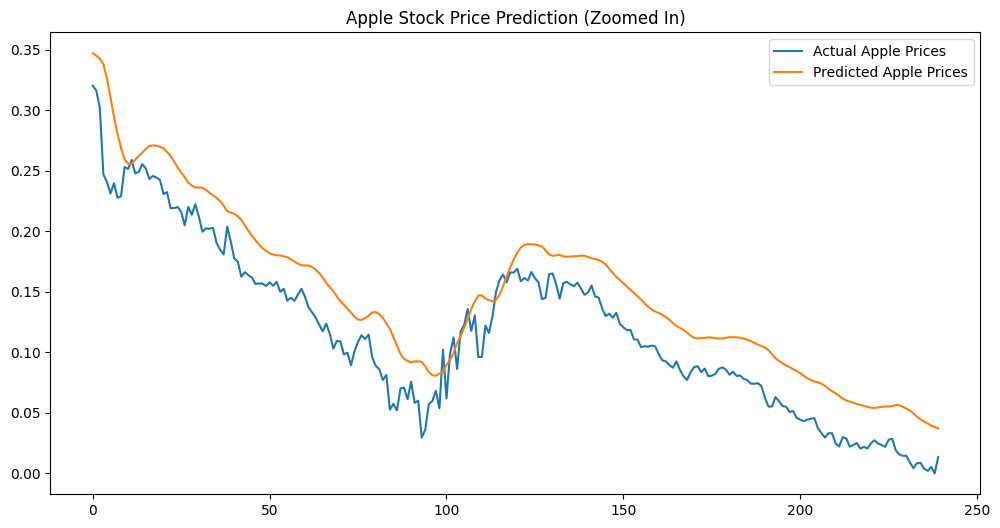

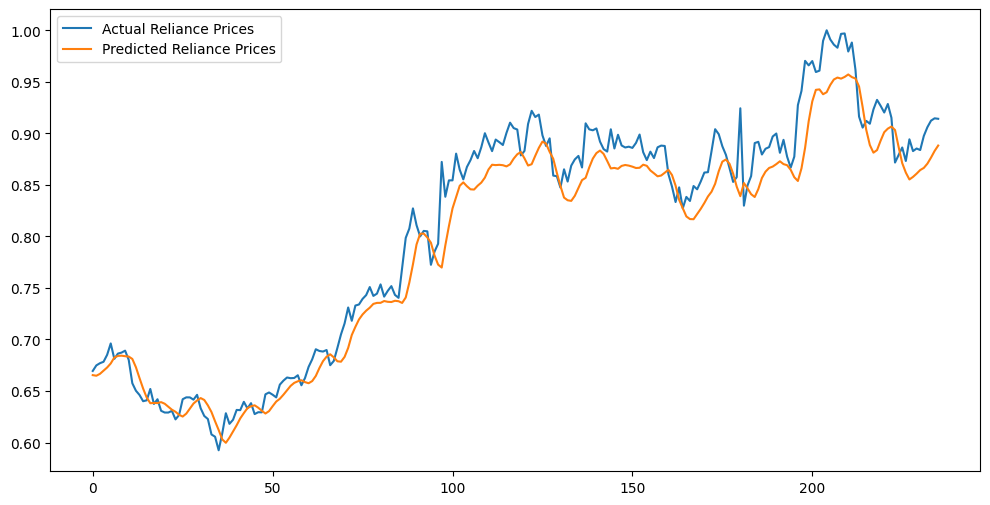

In [51]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred_apple = model_apple.predict(X_test_apple)
y_pred_reliance = model_reliance.predict(X_test_reliance)

# Inverse transform to original scale
y_test_apple = scaler.inverse_transform(y_test_apple.reshape(-1, 1))
y_pred_apple = scaler.inverse_transform(y_pred_apple)

plt.figure(figsize=(12, 6))
plt.plot(y_test_apple, label='Actual Apple Prices')
plt.plot(y_pred_apple, label='Predicted Apple Prices')
plt.title('Apple Stock Price Prediction (Zoomed In)')
plt.legend()
plt.show()

# Repeat for Reliance
y_test_reliance = scaler.inverse_transform(y_test_reliance.reshape(-1, 1))
y_pred_reliance = scaler.inverse_transform(y_pred_reliance)

plt.figure(figsize=(12, 6))
plt.plot(y_test_reliance, label='Actual Reliance Prices')
plt.plot(y_pred_reliance, label='Predicted Reliance Prices')
plt.legend()
plt.show()

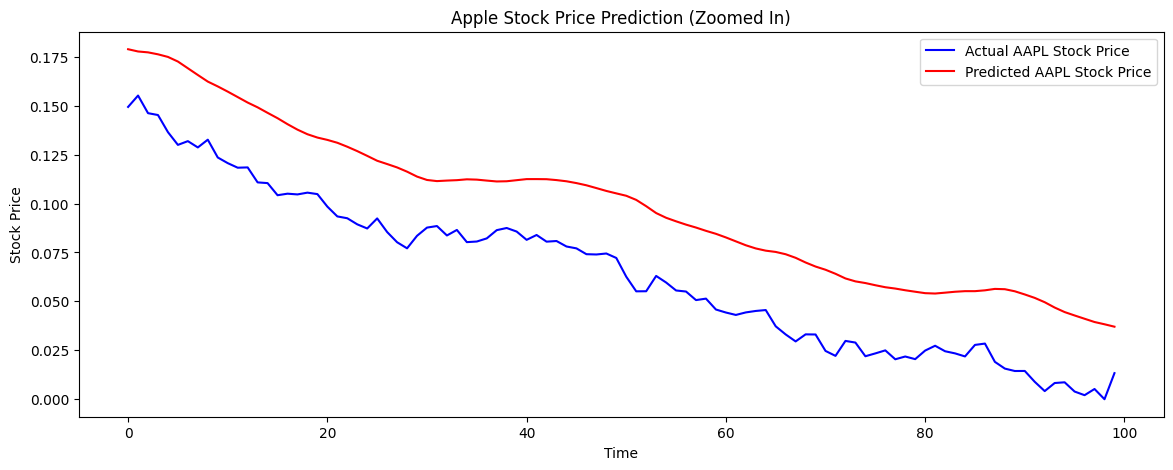

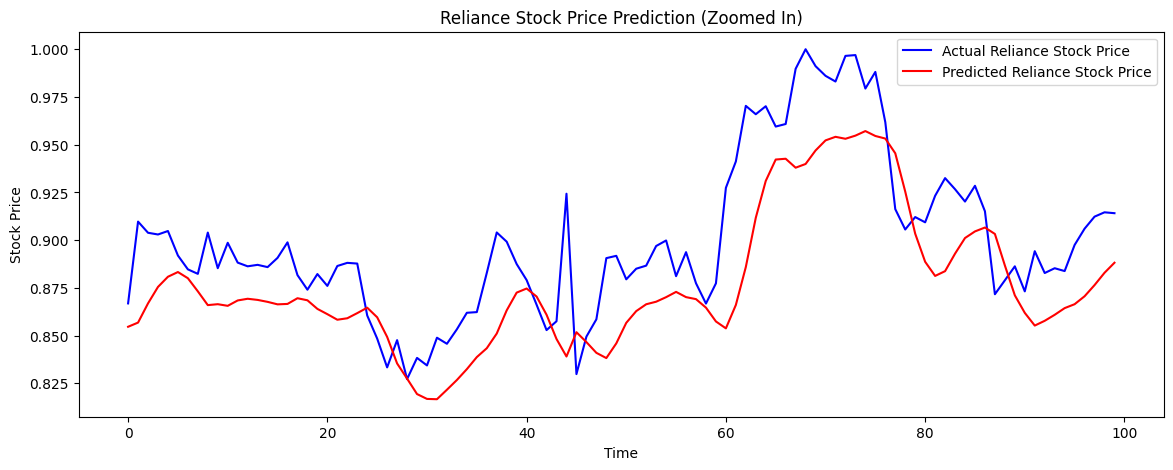

In [53]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_apple[-100:], color='blue', label='Actual AAPL Stock Price')
plt.plot(y_pred_apple[-100:], color='red', label='Predicted AAPL Stock Price')
plt.title('Apple Stock Price Prediction (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(y_test_reliance[-100:], color='blue', label='Actual Reliance Stock Price')
plt.plot(y_pred_reliance[-100:], color='red', label='Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Evaluation

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse_apple = np.sqrt(mean_squared_error(y_test_apple, y_pred_apple))
rmse_reliance = np.sqrt(mean_squared_error(y_test_reliance, y_pred_reliance))

print(f'RMSE for AAPL: {rmse_apple}')
print(f'RMSE for Reliance: {rmse_reliance}')

RMSE for AAPL: 0.03406619767669391
RMSE for Reliance: 0.026781484872148518
